# Problem Statement: Customer churn prediction

Customer churn is one of the most important metrics for a growing business to evaluate. While it's not the happiest measure, it's a number that can give your company the hard truth about its customer retention.

**Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame.**

This dataset provides us information of customers and the fact if they have converted into churn '1' or not '0'.

**By making a prediction model for such dataset, we can predict if a customer is going to leave or not and what are the factor responsible for a customer churning.**

In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#read and print data
customer_churn = pd.read_excel("/kaggle/input/customer-churn-dataset/customer_churn_large_dataset.xlsx")

customer_churn

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


# Data exploration and cleaning

In [3]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


**We can see that we have 6 numerical and 3 categorical columns**

In [4]:
#it is clear that our dataset does not have any null values, still we can also check it using:
customer_churn.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

**We do not have any null values**

In [5]:
# Check for duplicate rows in dataset based on CustomerId column

duplicate = customer_churn[customer_churn.duplicated('CustomerID', keep = False)]
print(duplicate)
#empty dataframe represents that there are no duplicates in our dataset

Empty DataFrame
Columns: [CustomerID, Name, Age, Gender, Location, Subscription_Length_Months, Monthly_Bill, Total_Usage_GB, Churn]
Index: []


**We do not have any duplicate values, so now we can drop CustomerID, Name attributes as they does not contribute anything to our analysis**

In [6]:
#drop customerID and name attributes from dataframe
customer_churn.drop(['CustomerID', 'Name'], axis = 1, inplace = True)
customer_churn.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


**Let's understand our attributes and if we need to make any changes in them**

In [7]:
#first creating a list of numerical attributes of dataframe

numerical = customer_churn.select_dtypes(include='number')
numerical = list(numerical.columns)
print(numerical)

['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn']


In [8]:
#first creating a list of categorical attributes of dataframe

categorical = customer_churn.select_dtypes(exclude='number')
categorical = list(categorical.columns)
print(categorical)

['Gender', 'Location']


**Let us understand distribution of values in our numerical column**

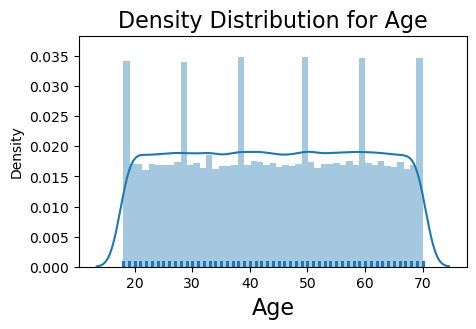

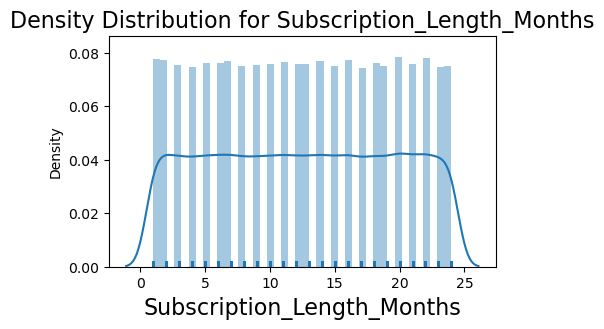

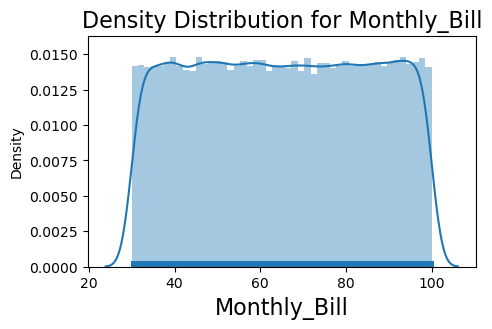

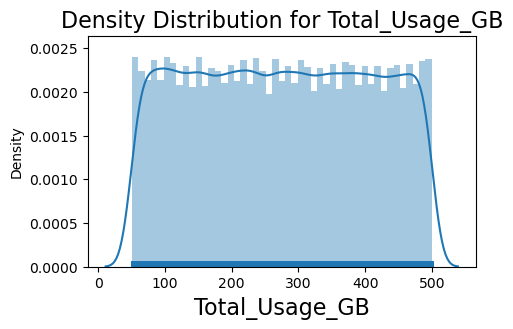

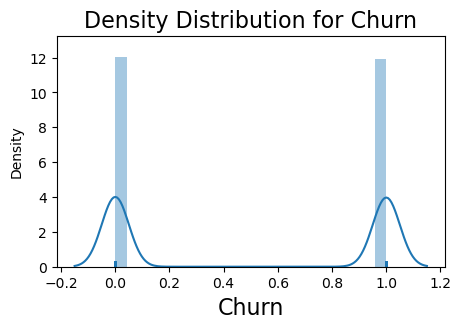

In [9]:
#Defining a function to plot distribution

def plot_density_distribution(column, title, xLabel) : 
    plt.figure(figsize=(5,3))
    sns.distplot(customer_churn[column],rug = True)
    plt.title(f'Density Distribution for {title}',fontsize=16)
    plt.xlabel(xLabel,fontsize=16)
    plt.show()
    
for i in numerical:
    plot_density_distribution(i, i, i)

**Density distribution of our numerical attributes gives us the following insights:**

1. We have many unique values in each column, but they're all almost balanced.
2. We have almost balanced dependent variable


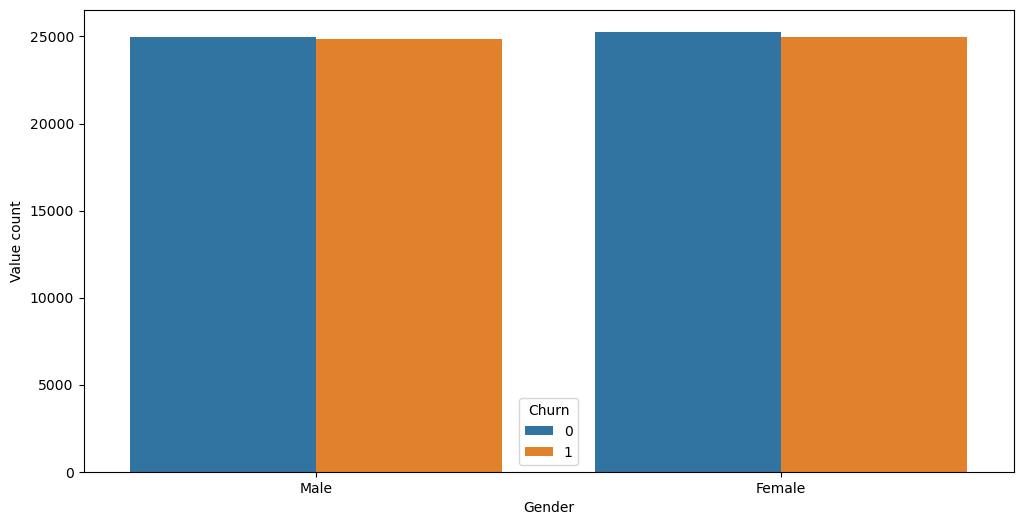

In [10]:
#Countplot of Sub Grade vs Loan Status
fig, ax = plt.subplots(figsize=(12,6)  , dpi=100)
sns.countplot(x='Gender', hue="Churn", data=customer_churn)
ax.set_xlabel('Gender')
ax.set_ylabel('Value count')
plt.show()

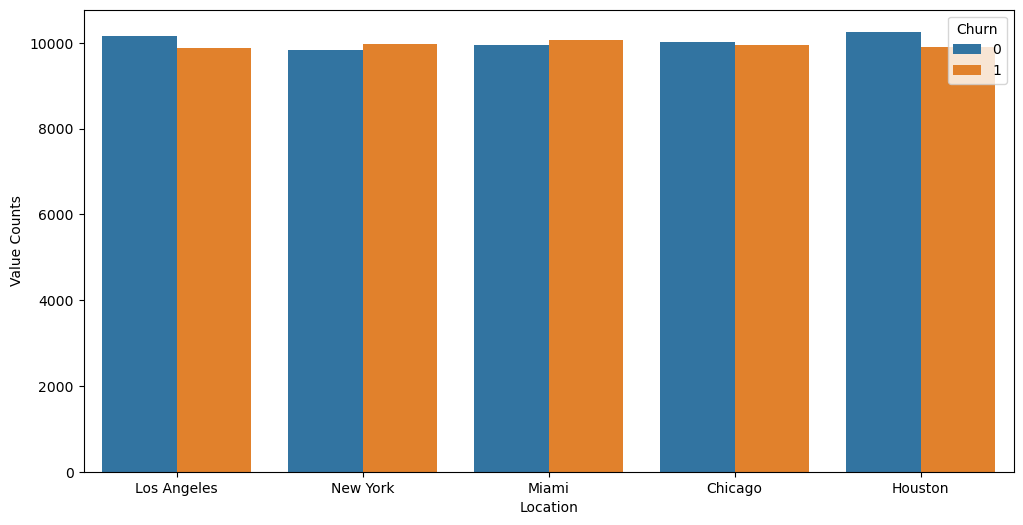

In [11]:
#Countplot of Sub Grade vs Loan Status
fig, ax = plt.subplots(figsize=(12,6), dpi=100)

sns.countplot(x='Location', hue="Churn", data=customer_churn)

ax.set_xlabel('Location')
ax.set_ylabel('Value Counts')

plt.show()

<Axes: >

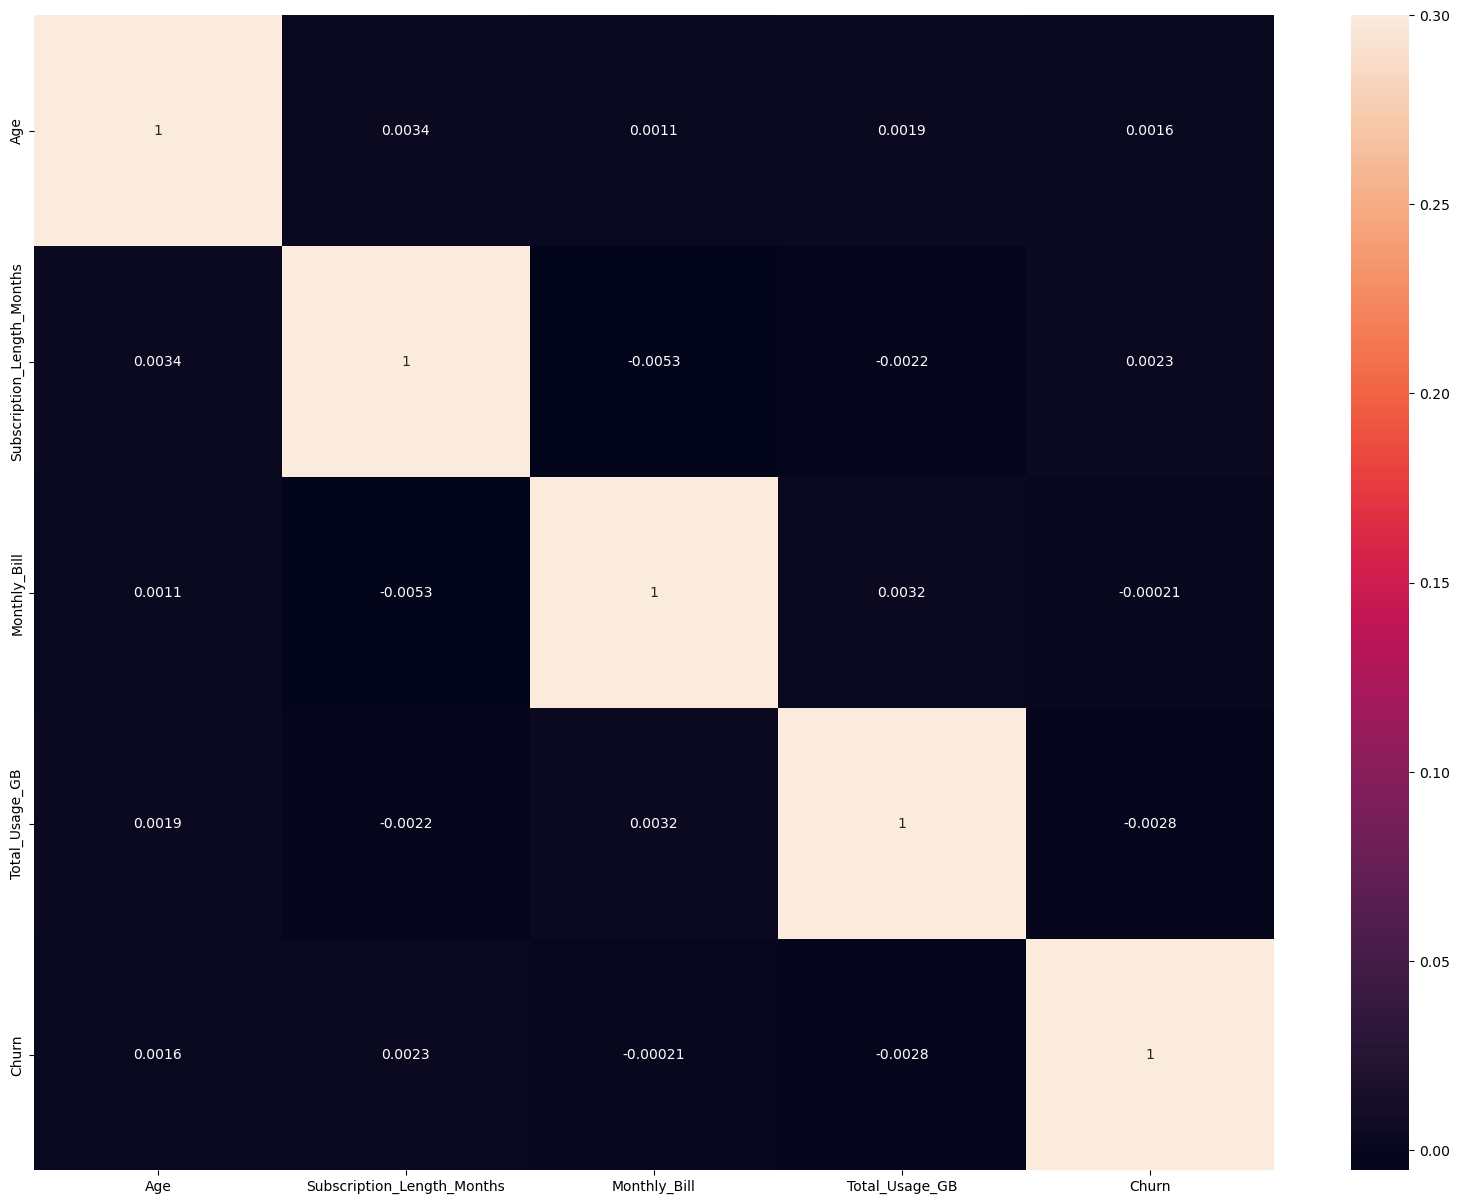

In [12]:
#looking for multicollinearity in our data
#To identify correlation between all variables of the dataset and see which variables are negativey impacting loan_status variable
f, ax = plt.subplots(figsize=(20, 15))
corr = customer_churn.corr()
sns.heatmap(corr,  vmax=.3, annot=True)

**No multicollinearity in our dataset, so all the remaining columns of our dataset are equally important for predicting our class variable**

# Feature Engineering: Encoding of categorical variables and Normalization of numerical variables

In [13]:
#Gender and Location are two categorical variables in our dataset
#for location variable, we have 5 different values, so we will use label encoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
customer_churn.Gender = label.fit_transform(customer_churn.Gender)
#customer_churn.Location = label.fit_transform(customer_churn.Location)
customer_churn = pd.get_dummies(customer_churn)
print(customer_churn.head())

   Age  Gender  Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  \
0   63       1                          17         73.36             236   
1   62       0                           1         48.76             172   
2   24       0                           5         85.47             460   
3   36       0                           3         97.94             297   
4   46       0                          19         58.14             266   

   Churn  Location_Chicago  Location_Houston  Location_Los Angeles  \
0      0                 0                 0                     1   
1      0                 0                 0                     0   
2      0                 0                 0                     1   
3      1                 0                 0                     0   
4      0                 0                 0                     0   

   Location_Miami  Location_New York  
0               0                  0  
1               0                  1  
2    

In [14]:
scale_cols = ['Age','Subscription_Length_Months','Total_Usage_GB', 'Monthly_Bill']
# now we will apply scaling/normalization on all numerical data to avoid biased prediction
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
customer_churn[scale_cols] = scale.fit_transform(customer_churn[scale_cols])
customer_churn

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,0.865385,1,0.695652,0.619429,0.413333,0,0,0,1,0,0
1,0.846154,0,0.000000,0.268000,0.271111,0,0,0,0,0,1
2,0.115385,0,0.173913,0.792429,0.911111,0,0,0,1,0,0
3,0.346154,0,0.086957,0.970571,0.548889,1,0,0,0,1,0
4,0.538462,0,0.782609,0.402000,0.480000,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,0.288462,1,0.956522,0.359000,0.391111,1,0,1,0,0,0
99996,0.846154,0,0.782609,0.452143,0.668889,0,0,0,0,0,1
99997,0.884615,1,0.695652,0.944429,0.446667,1,1,0,0,0,0
99998,0.634615,0,0.826087,0.275000,0.853333,1,0,0,0,0,1


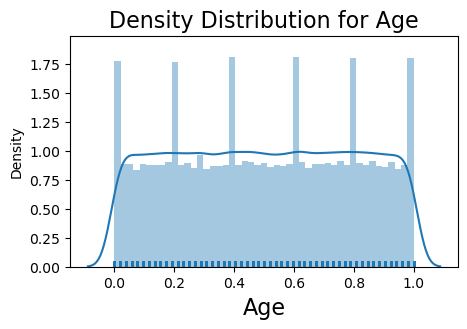

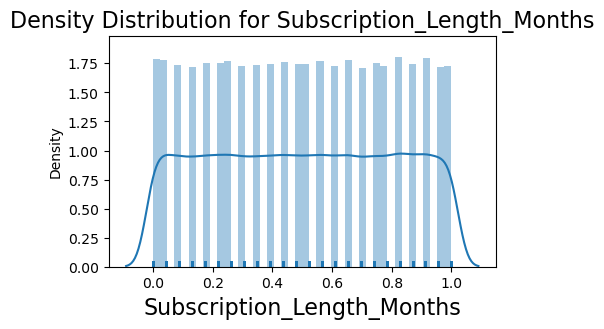

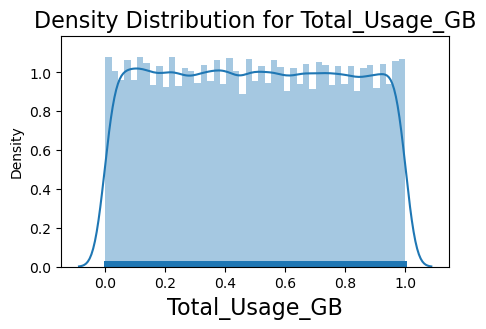

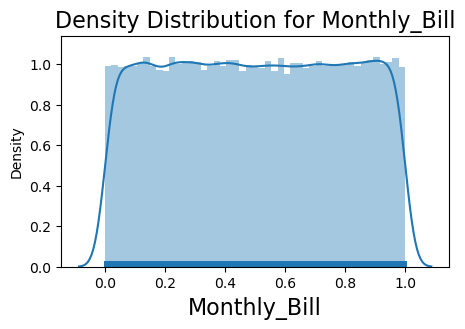

In [15]:
#Defining a function to plot distribution

def plot_density_distribution(column, title, xLabel) : 
    plt.figure(figsize=(5,3))
    sns.distplot(customer_churn[column],rug = True)
    plt.title(f'Density Distribution for {title}',fontsize=16)
    plt.xlabel(xLabel,fontsize=16)
    plt.show()
    
for i in scale_cols:
    plot_density_distribution(i, i, i)

# Split Dataset into training and test

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [17]:
X = customer_churn.drop(columns = ['Churn'])
y = customer_churn['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [18]:
y_train.value_counts()

0    35155
1    34845
Name: Churn, dtype: int64

In [19]:
y_test.value_counts()

0    15066
1    14934
Name: Churn, dtype: int64

# Model Selection and Definitions

Let us try different base models and then we will select one of them for hypertuning.

**Logistic Regression**

In [20]:
#As we just want to classify in 2 categories we can use numerous model like logistic regression, support vector machine,
#decision tree, random forest etc.
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

Logistic Regression accuracy is : 0.4986333333333333
              precision    recall  f1-score   support

           0       0.50      0.64      0.56     15066
           1       0.50      0.36      0.41     14934

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



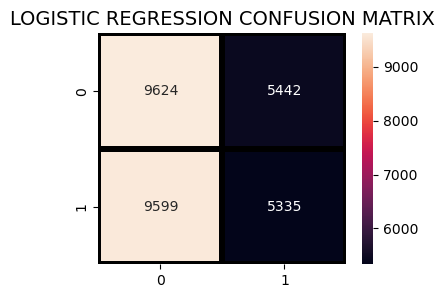

In [21]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

**AdaBoost Classifier**

In [22]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy: ", metrics.accuracy_score(y_test, a_preds))
print(classification_report(y_test, a_preds))

AdaBoost Classifier accuracy:  0.49643333333333334
              precision    recall  f1-score   support

           0       0.50      0.57      0.53     15066
           1       0.49      0.42      0.46     14934

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



**Random forest classifier**

In [23]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print("Random forest classifier accuracy: ",metrics.accuracy_score(y_test, prediction_test))

print(classification_report(y_test, prediction_test))

Random forest classifier accuracy:  0.5003
              precision    recall  f1-score   support

           0       0.50      0.66      0.57     15066
           1       0.50      0.34      0.40     14934

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



**Decision Tree Classifier**

In [24]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)
print(classification_report(y_test, predictdt_y))

Decision Tree accuracy is : 0.5061333333333333
              precision    recall  f1-score   support

           0       0.51      0.50      0.51     15066
           1       0.50      0.51      0.51     14934

    accuracy                           0.51     30000
   macro avg       0.51      0.51      0.51     30000
weighted avg       0.51      0.51      0.51     30000



**K Nearest Neighbour (KNN) Classifier**

In [25]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)
print(classification_report(y_test, predicted_y))

KNN accuracy: 0.5006333333333334
              precision    recall  f1-score   support

           0       0.50      0.51      0.50     15066
           1       0.50      0.50      0.50     14934

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000

